In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings 
import seaborn as sns

In [2]:
df = pd.read_csv('Call.csv')

In [3]:
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call_Call_duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/5/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/4/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [4]:
df.csat_score

0        7.0
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
32936    NaN
32937    NaN
32938    NaN
32939    8.0
32940    NaN
Name: csat_score, Length: 32941, dtype: float64

In [5]:

df.csat_score.median()

5.0

In [6]:
#Data Preprocessing filling in nan with median values
df.csat_score = df.csat_score.fillna(df.csat_score.median())
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call_Call_duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,5.0,10/5/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,5.0,10/4/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,5.0,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32941 non-null  object 
 1   customer_name                  32941 non-null  object 
 2   sentiment                      32941 non-null  object 
 3   csat_score                     32941 non-null  float64
 4   call_timestamp                 32941 non-null  object 
 5   reason                         32941 non-null  object 
 6   city                           32941 non-null  object 
 7   state                          32941 non-null  object 
 8   channel                        32941 non-null  object 
 9   response_time                  32941 non-null  object 
 10  call_Call_duration in minutes  32941 non-null  int64  
 11  call_center                    32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usa

In [8]:
df.columns

Index(['id', 'customer_name', 'sentiment', 'csat_score', 'call_timestamp',
       'reason', 'city', 'state', 'channel', 'response_time',
       'call_Call_duration in minutes', 'call_center'],
      dtype='object')

In [9]:
#Checking the stats
df.describe()

,csat_score,call_Call_duration in minutes
count,32941.000000,32941.000000
mean,5.204305,25.021159
std,1.471207,11.816218
min,1.000000,5.000000
25%,5.000000,15.000000
50%,5.000000,25.000000
75%,5.000000,35.000000
max,10.000000,45.000000


In [10]:
df.shape

(32941, 12)

In [11]:
df.isnull().sum()

id                               0
customer_name                    0
sentiment                        0
csat_score                       0
call_timestamp                   0
reason                           0
city                             0
state                            0
channel                          0
response_time                    0
call_Call_duration in minutes    0
call_center                      0
dtype: int64

# EXPLORATORY ANALYSIS

# * The major reason for reaching out to the customer service team
*Billing questions were the major reasons

In [12]:
df_1= df.pivot_table(index='reason', columns='sentiment', aggfunc='size')
df_1.style.background_gradient('Greens')

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
reason,,,,,
Billing Question,7868,6232,2775,4300,2287
Payments,1593,1238,552,897,469
Service Outage,1602,1284,601,829,414


# Does Response Time Influence the Customers satisfaction Score?

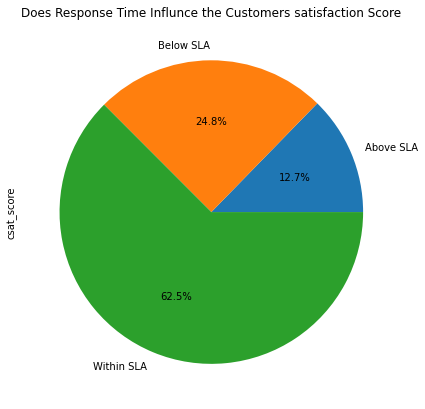

In [13]:
#How many subscriber per level?
plt.figure(figsize = (6.8,7.3))

#df.groupby('level')['num_subscribers'].sum().plot(kind='pie', autopct='%1.1f%%')
#plt.show()
df.groupby('response_time')['csat_score'].sum().plot(kind='pie', autopct='%1.1f%%', title='Does Response Time Influnce the Customers satisfaction Score')
plt.show()

# Does the Customer's sentiment influence the satisfacton score ?*

* From the csat score, it shows that customers with Nagative Sentiment gave a higher rating than those with [Positive] and [Very Positive] Sentiment.
* Probably the reason for the high rating in the neagtive sentiment was due to the effectivness of the Customer Service team

In [14]:
#From the csat score, it shows that customers with Nagative Sentiment gave a higher rating than those with 
#[Positive] and [Very Positive] Sentiment.

#Probably the reason for the high rating in the neagtive sentiment was due to the effectivness of the Customer Service team
sentiment_score_df = pd.DataFrame(df.groupby('sentiment').sum()['csat_score'])
sentiment_score_df.sort_values ('csat_score', ascending=False) 

,csat_score
sentiment,
Negative,53386.0
Neutral,48578.0
Very Negative,24343.0
Positive,24106.0
Very Positive,21022.0


[]

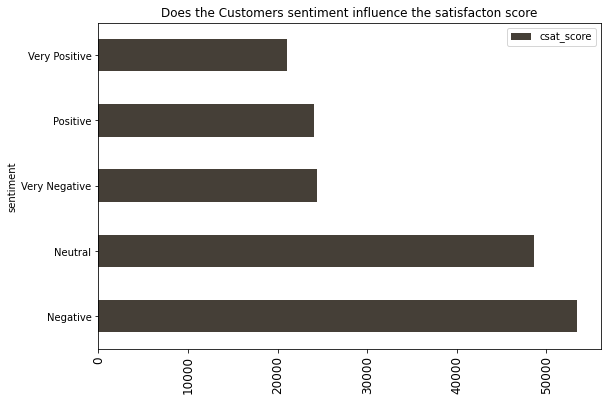

In [183]:
sentiment_score_df = pd.DataFrame(df.groupby('sentiment').sum()['csat_score'])
sentiment_score_df.sort_values ('csat_score', ascending=False) .plot(kind='barh', title='Does the Customers sentiment influence the satisfacton score', color='#453f37',figsize = [9,6])
plt.xticks(rotation='vertical', size=12)
plt.plot()

# Does Sentiments Trigger call Duration?


In [17]:
#Looking at the progression below, it shows that customers with [Negative] 
#sentiment had a higher call duration than people with [postive] and [very postive] sentiment.
sentiment_call_df = pd.DataFrame(df.groupby('sentiment').sum()['call_Call_duration in minutes'])
sentiment_call_df.sort_values ('call_Call_duration in minutes', ascending=False)

,call_Call_duration in minutes
sentiment,
Negative,279471
Neutral,218323
Very Negative,150283
Positive,97658
Very Positive,78487


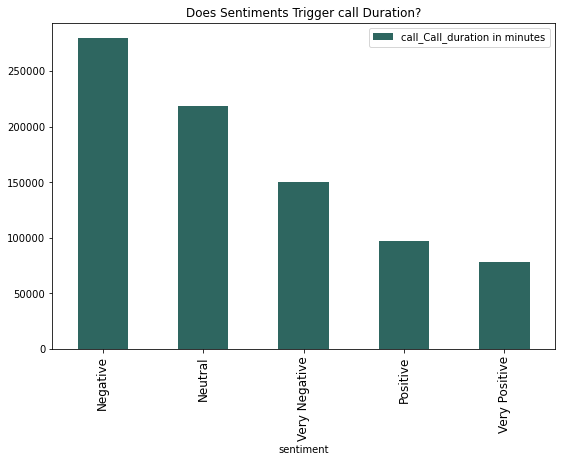

In [182]:
sentiment_call_df = pd.DataFrame(df.groupby('sentiment').sum()['call_Call_duration in minutes'])
sentiment_call_df.sort_values ('call_Call_duration in minutes', ascending=False).plot(kind='bar', title='Does Sentiments Trigger call Duration?', color='#2e6660',figsize = [9,6])
plt.xticks(rotation='vertical', size=12)
plt.show()

# Location of Contact centers that received the most negative sentiment from customers 
* Los Angeles /CA was the Highest

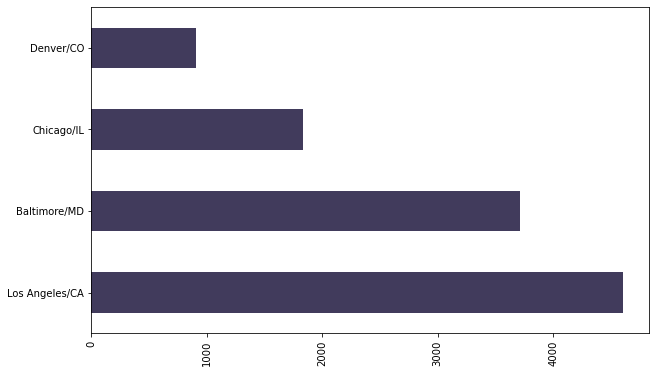

In [178]:
#Location of Contact centers that received the most negative sentiment from customers 
df[df['sentiment']== 'Negative'].call_center.value_counts().plot(kind='barh', color='#413b5c', figsize = [10,6])
plt.xticks(rotation='vertical', size=10)
plt.show()

#  Channels through which Customers reached out to the Contact center Team*
* Calls from the Call-Centre had the highest Traffic
* The least was the web

In [20]:
df['channel'].value_counts(normalize='True')

Call-Center    0.322971
Chatbot        0.250630
Email          0.226769
Web            0.199630
Name: channel, dtype: float64

# Does call duration ? have an effect on Customer Staisfaction Rating

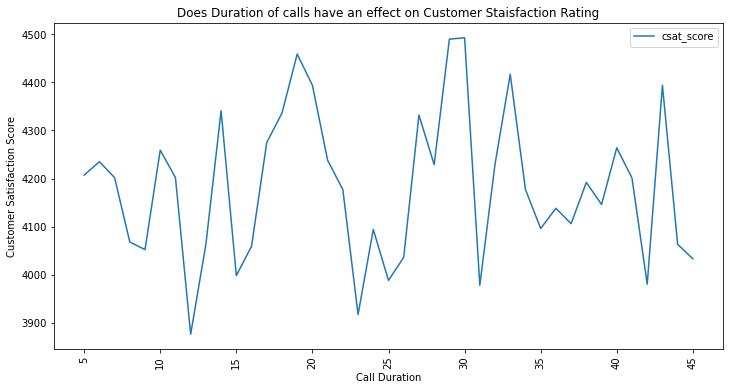

In [21]:
## Does Duration of calls have an effect on Customer Staisfaction Survey
duration_call_df =pd.DataFrame(df.groupby('call_Call_duration in minutes').sum()['csat_score']).plot(figsize = [12,6])
plt.xlabel('Call Duration')
plt.ylabel('Customer Satisfaction Score')
plt.title('Does Duration of calls have an effect on Customer Staisfaction Rating')
plt.xticks(rotation='vertical', size=10)
plt.show()


In [22]:
pd.DataFrame(df.groupby('call_Call_duration in minutes').sum()['csat_score']).head()

,csat_score
call_Call_duration in minutes,
5,4207.0
6,4235.0
7,4202.0
8,4068.0
9,4052.0


# filter that dataframe and create seperate tables of customers that that experessed different sentiements  

In [107]:
#Customer #Customer Who had negative Sentiments
Negative =df[(df.sentiment== 'Negative')]

In [108]:
Negative=Negative[[ 'id','customer_name','sentiment','reason']]

In [109]:
Negative.head()

,id,customer_name,sentiment,reason
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,Billing Question
10,RJF-00263922-O-647027-TB,Ella Cristoforo,Negative,Billing Question
11,ZQN-32874873-e-786499-kJ,Aubrey Surcombe,Negative,Billing Question
15,BEJ-69711449-V-758715-cp,Dani Stanfield,Negative,Billing Question
16,DEC-83767217-S-314070-eR,Margarette Jehaes,Negative,Billing Question


In [110]:
#Customer Who had a Neutral Sentiments
Neutral =df[(df.sentiment== 'Neutral')]

In [111]:
Neutral=Neutral[['id','customer_name','sentiment','reason']]

In [112]:
Neutral.head()

,id,customer_name,sentiment,reason
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,Billing Question
5,JVI-79728660-U-224285-4a,Kaylyn Emlen,Neutral,Billing Question
6,AZI-95054097-e-185542-PT,Phillipe Bowring,Neutral,Billing Question
9,RLC-64108207-Z-285141-VS,Port Inggall,Neutral,Billing Question
17,XNY-04106353-Y-318117-I9,Noni Greatrakes,Neutral,Billing Question


In [113]:
#Customer Who had a Very Negative Sentiments
Very_Negative =df[(df.sentiment== 'Very Negative')]

In [114]:
Very_Negative=Very_Negative[['id','customer_name','sentiment','reason']]

In [115]:
Very_Negative.head()

,id,customer_name,sentiment,reason
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,Billing Question
8,XNG-44599118-P-344473-ZU,Oran Lifsey,Very Negative,Billing Question
14,ZOV-95861398-a-333622-9r,Odell Cathesyed,Very Negative,Payments
19,DJU-19977844-M-356042-cQ,Tammie Bettinson,Very Negative,Payments
22,GZD-50459522-O-178569-D2,Sophie Kleinerman,Very Negative,Billing Question


In [116]:
#Customer Who had a Positive Sentiments
Positive =df[(df.sentiment== 'Positive')]

In [117]:
Positive=Positive[['id','customer_name','sentiment','reason']]

In [118]:
Positive.head()

,id,customer_name,sentiment,reason
7,TWX-27007918-I-608789-Xw,Krysta de Tocqueville,Positive,Billing Question
13,DPT-56483482-P-371409-CQ,Melesa Ricardot,Positive,Billing Question
25,ISK-94965442-x-233388-Vz,Bethina Fazzioli,Positive,Billing Question
34,IZI-93062579-M-779259-Aj,Quinton Marchelli,Positive,Payments
47,RTW-93566842-a-737480-ex,Luca Castel,Positive,Payments


In [119]:

# #Customer Who had a Very Positive Sentiments
Very_Positive =df[(df.sentiment== 'Very Positive')]

In [120]:
Very_Positive=Very_Positive[['id','customer_name','sentiment','reason']]

In [121]:
Very_Positive.head()

,id,customer_name,sentiment,reason
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,Service Outage
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,Payments
12,JDP-35147568-w-630120-3l,Nicolle Fareweather,Very Positive,Billing Question
27,PKG-51691289-6-484895-mg,Anissa Kinrade,Very Positive,Payments
28,YSU-89393344-7-508964-gG,Bradly Dinkin,Very Positive,Billing Question


# export each filtered dataframe to csv

In [122]:
Very_Negative.dtypes

id               object
customer_name    object
sentiment        object
reason           object
dtype: object

In [135]:
Negative.to_csv('Negative.csv',index=False, encoding='utf-8')

Negative_file =open('Negative.csv')
print('file opened in memory')

file opened in memory


In [ ]:
Neutral.to_csv('Neutral.csv',index=False,encoding='utf-8')

Neutral =open('Neutral.csv')
print('file opened in memory')

In [140]:
Very_Negative.to_csv('Very_Negative',index=False,encoding='utf-8')

Very_Negative =open('Very_Negative.csv')
print('file opened in memory')

file opened in memory


In [142]:
Positive.to_csv('Positive',index=False,encoding='utf-8')
Positive =open('Positive.csv')
print('file opened in memory')

file opened in memory


In [144]:
Very_Positive.to_csv('Very_Positive',index=False,encoding='utf-8')
Very_Positive =open('Very_Positive.csv')
print('file opened in memory')

file opened in memory


# CONVERTED PANDAS DATATYPES INTO SQL DATATYPES

In [95]:
    #conversion process using a dictionary 
    replacements = {
        'object': 'varchar'
}
replacements    

{'object': 'varchar'}

* looping through the dictioanry and changing the datatypes from object to varchar 

In [184]:
#looping through the dictioanry and changing the datatypes from object to varchar 

In [97]:
Negative_col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(Negative.columns, Negative.dtypes.replace(replacements)))
Negative_col_str

'id varchar, customer_name varchar, sentiment varchar, reason varchar'

In [99]:
Neutral_col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(Neutral.columns, Neutral.dtypes.replace(replacements)))
Neutral_col_str

'id varchar, customer_name varchar, sentiment varchar, reason varchar'

In [98]:
Very_Negative_col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(Very_Negative.columns, Very_Negative.dtypes.replace(replacements)))
Very_Negative_col_str

'id varchar, customer_name varchar, sentiment varchar, reason varchar'

In [100]:
Positive_col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(Positive.columns, Positive.dtypes.replace(replacements)))
Positive_col_str

'id varchar, customer_name varchar, sentiment varchar, reason varchar'

In [101]:
Very_Positive_col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(Very_Positive.columns, Very_Positive.dtypes.replace(replacements)))
Very_Positive_col_str

'id varchar, customer_name varchar, sentiment varchar, reason varchar'

In [ ]:
id               object
customer_name    object
sentiment        object
reason 

# Exported five csv files that contains the Customers Data into a Postgres sql server

In [168]:
import psycopg2 


In [166]:
conn= psycopg2.connect('dbname=demo user=postgres host=localhost password=stipulated port=5434')
conn

<connection object at 0x000002E1D1C8D370; dsn: 'user=postgres password=xxx dbname=demo host=localhost port=5434', closed: 0>

In [167]:
cursor=conn.cursor()

* CREATED TABLES IN SQL SERVER

In [106]:
cursor.execute("create table Negative (id varchar, customer_name varchar, sentiment varchar, reason varchar)")

In [129]:
cursor.execute("create table Neutral (id varchar, customer_name varchar, sentiment varchar, reason varchar)")

In [130]:
cursor.execute("create table Very_Negative (id varchar, customer_name varchar, sentiment varchar, reason varchar)")

In [131]:
cursor.execute("create table Positive (id varchar, customer_name varchar, sentiment varchar, reason varchar)")

In [132]:
cursor.execute("create table Very_Positive (id varchar, customer_name varchar, sentiment varchar, reason varchar)")

* IMPORTING csv files into postgres server AND FETCHING tabels FROM DATABASE 

In [ ]:
#IMPORTING csv files into postgres AND FETCHING tabels FROM DATABASE 
SQL_QUERY="""
COPY Negative FROM STDIN WITH
    CSV 
    HEADER
    DELIMITER AS ','

"""

cursor.copy_expert(sql=SQL_QUERY, file=Negative)
print('file copied to db')


In [171]:
cursor.execute('SELECT * FROM Negative LIMIT 3')
cursor.fetchall()

[('GYJ-30025932-A-023015-LD',
  'Averill Brundrett',
  'Negative',
  'Billing Question'),
 ('RJF-00263922-O-647027-TB',
  'Ella Cristoforo',
  'Negative',
  'Billing Question'),
 ('ZQN-32874873-e-786499-kJ',
  'Aubrey Surcombe',
  'Negative',
  'Billing Question')]

In [155]:
SQL_QUERY="""
COPY Neutral FROM STDIN WITH
    CSV 
    HEADER
    DELIMITER AS ','

"""

cursor.copy_expert(sql=SQL_QUERY, file=Neutral)
print('file copied to db')

conn.commit()

file copied to db


In [172]:
cursor.execute('SELECT * FROM Neutral LIMIT 3')
cursor.fetchall()

[('DKK-57076809-w-055481-fU',
  'Analise Gairdner',
  'Neutral',
  'Billing Question'),
 ('JVI-79728660-U-224285-4a', 'Kaylyn Emlen', 'Neutral', 'Billing Question'),
 ('AZI-95054097-e-185542-PT',
  'Phillipe Bowring',
  'Neutral',
  'Billing Question')]

In [161]:
SQL_QUERY="""
COPY Very_Negative FROM STDIN WITH
    CSV 
    HEADER
    DELIMITER AS ','

"""

cursor.copy_expert(sql=SQL_QUERY, file=Very_Negative)
print('file copied to db')

conn.commit()

file copied to db


In [173]:
cursor.execute('SELECT * FROM Very_Negative LIMIT 3')
cursor.fetchall()

[('ZJI-96807559-i-620008-m7',
  'Noreen Lafflina',
  'Very Negative',
  'Billing Question'),
 ('XNG-44599118-P-344473-ZU',
  'Oran Lifsey',
  'Very Negative',
  'Billing Question'),
 ('ZOV-95861398-a-333622-9r', 'Odell Cathesyed', 'Very Negative', 'Payments')]

In [162]:
SQL_QUERY="""
COPY Positive FROM STDIN WITH
    CSV 
    HEADER
    DELIMITER AS ','

"""

cursor.copy_expert(sql=SQL_QUERY, file=Positive)
print('file copied to db')

conn.commit()

file copied to db


In [174]:
cursor.execute('SELECT * FROM Positive LIMIT 3')
cursor.fetchall()

[('TWX-27007918-I-608789-Xw',
  'Krysta de Tocqueville',
  'Positive',
  'Billing Question'),
 ('DPT-56483482-P-371409-CQ',
  'Melesa Ricardot',
  'Positive',
  'Billing Question'),
 ('ISK-94965442-x-233388-Vz',
  'Bethina Fazzioli',
  'Positive',
  'Billing Question')]

In [163]:
SQL_QUERY="""
COPY Very_Positive FROM STDIN WITH
    CSV 
    HEADER
    DELIMITER AS ','

"""

cursor.copy_expert(sql=SQL_QUERY, file=Very_Positive)
print('file copied to db')

conn.commit()

file copied to db


In [175]:
cursor.execute('SELECT * FROM Very_Positive LIMIT 3')
cursor.fetchall()

[('QGK-72219678-w-102139-KY',
  'Crichton Kidsley',
  'Very Positive',
  'Service Outage'),
 ('DDU-69451719-O-176482-Fm',
  'Toma Van der Beken',
  'Very Positive',
  'Payments'),
 ('JDP-35147568-w-630120-3l',
  'Nicolle Fareweather',
  'Very Positive',
  'Billing Question')]